<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

## Part 2

### Creating Linear Regression Models

After cleaning the data and doing EDA on the data, I will now begin to create models which to predict house prices. Once the model is created, I will evaluate the model using MSE and regularize it using lasso and ridge. 

The model with the lowest MSE will be chosen.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    LassoCV,
    Ridge,
    RidgeCV,
)

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import (
    train_test_split,
    cross_val_score
)

from sklearn.preprocessing import (
    PolynomialFeatures,
    StandardScaler
)

In [2]:
# importing the data set which was cleaned previously
ames = pd.read_csv('../datasets/ames_cleaned.csv')

In [3]:
ames

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_since_remodel,age,neighborhood_value
0,109,533352170,60,RL,0.0,13517,Pave,IR1,Lvl,AllPub,...,0,0,0,3,2010,WD,130500,5,34,1.37
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,0,0,0,4,2009,WD,220000,12,13,1.88
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,0,0,0,1,2010,WD,109000,3,57,1.46
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,...,0,0,0,4,2010,WD,174000,3,4,2.40
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,...,0,0,0,3,2010,WD,138500,17,110,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,1587,921126030,20,RL,79.0,11449,Pave,IR1,HLS,AllPub,...,0,0,0,1,2008,WD,298751,1,1,2.40
2042,785,905377130,30,RL,0.0,12342,Pave,IR1,Lvl,AllPub,...,0,0,0,3,2009,WD,82500,59,69,1.30
2043,916,909253010,50,RL,57.0,7558,Pave,Reg,Bnk,AllPub,...,0,0,0,3,2009,WD,177000,59,81,2.06
2044,639,535179160,20,RL,80.0,10400,Pave,Reg,Lvl,AllPub,...,0,0,0,11,2009,WD,144000,53,53,1.46


### Model 1

As the first model, I will create a simple model based on only a features which are intuitive to predicting sale price.

In [4]:
# choosing numerical features to make a simple model
features_1 = [
    'overall_qual', 'gr_liv_area','garage_area',
    'age', 'neighborhood_value', 'totrms_abvgrd',
    'full_bath'
]

In [5]:
# Assembling the X and y variables
X1 = ames[features_1]
y1 = ames['saleprice']

# Creating a train/test split with a test size of 20%
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1,
    y1,
    test_size=0.2,
)

In [6]:
# Scale the the variables as the features are all on different scales.
ss = StandardScaler()
ss.fit(X_train1)

Z_train1 = ss.transform(X_train1)
Z_test1 = ss.transform(X_test1)


In [7]:
# Instantiating the model
lr1 = LinearRegression()

In [8]:
# Fitting it to the scaled variables
lr1.fit(Z_train1, y_train1)

LinearRegression()

In [9]:
# Evaluating with 10 folds cross validation scoring with mean squared error
- cross_val_score(
    lr1,
    Z_train1,
    y_train1,
    cv=10,
    scoring='neg_mean_squared_error'
).mean()

1118173701.0934584

In [10]:
# Calculating the mean squared error on the test data
mean_squared_error(
    y_test1,
    lr1.predict(Z_test1)
)

1214244214.399837

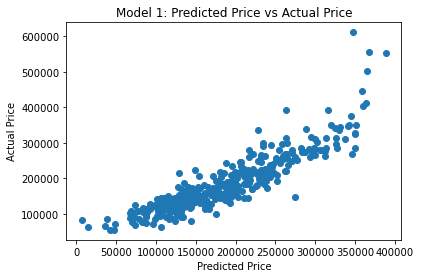

In [11]:
plt.scatter(lr1.predict(Z_test1), y_test1)
plt.title('Model 1: Predicted Price vs Actual Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price');

#### Performing Lasso regularization on model 1

In [12]:
# Instantiating Lasso regularization
lasso1 = LassoCV(n_alphas=200)

In [13]:
# Fitting the lasso model
lasso1.fit(Z_train1, y_train1)

# Calculating best alpha for the model
lasso1.alpha_

64.02158622058437

In [14]:
# Reinstantiate Lasso with the best alpha.
lasso_best1 = Lasso(alpha=lasso1.alpha_)

In [15]:
# Evaluating with 10 folds cross validation scoring with mean squared error
- cross_val_score(
    lasso_best1,
    Z_train1,
    y_train1,
    cv=10,
    scoring='neg_mean_squared_error'
).mean()

1118260904.41443

In [16]:
# Refitting the lasso model
lasso_best1.fit(Z_train1, y_train1)

# Calculating the mean squared error on the test data
mean_squared_error(
    y_test1,
    lasso_best1.predict(Z_test1)
)

1211992546.0048723

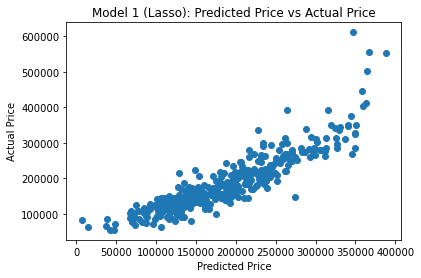

In [17]:
plt.scatter(lasso_best1.predict(Z_test1), y_test1)
plt.title('Model 1 (Lasso): Predicted Price vs Actual Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price');

#### Performing Ridge regularization on model 1

In [18]:
# Instantiating Ridge regularization
ridge1 = RidgeCV(alphas=np.logspace(0, 10, 200))

In [19]:
# Fitting the Ridge model
ridge1.fit(Z_train1, y_train1)

# Calculating best alpha for the model
ridge1.alpha_

4.500557675700499

In [20]:
# Reinstantiate Lasso with the best alpha.

ridge_best1 = Ridge(alpha=ridge1.alpha_)

In [21]:
# Evaluating with 10 folds cross validation scoring with mean squared error
- cross_val_score(
    ridge_best1,
    Z_train1,
    y_train1,
    cv=10,
    scoring='neg_mean_squared_error'
).mean()

1118136630.749744

In [22]:
# Refitting the Ridge model
ridge_best1.fit(Z_train1, y_train1)

# Calculating the mean squared error on the test data
mean_squared_error(
    y_test1,
    ridge_best1.predict(Z_test1)
)

1212538100.20586

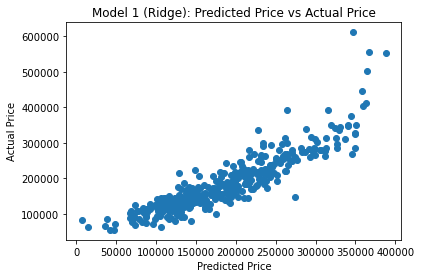

In [23]:
plt.scatter(ridge_best1.predict(Z_test1), y_test1)
plt.title('Model 1 (Ridge): Predicted Price vs Actual Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price');

For model 1, the MSE and cross val scores are quite close and penalization does not seem to improve the models much. 

However, this gives a baseline target for future models to benchmark against.

Based on the scatter plots, the graph seem to have a curve. Creating polynomial features may improve the model.

### Model 2

For this model, I will seek to improve on model 1 by introducing polynomial features.

In [24]:
# Instantiating the PolynomialFeature function with a degree of 2.
poly = PolynomialFeatures(include_bias=False, degree=2)

In [25]:
# Creating the values of PolynomialFeatures
X_poly = poly.fit_transform(X1)

In [26]:
# Recreating the train/test split
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly,
    y1,
    test_size=0.2,
)

In [27]:
# Scale the polynomial features
ss = StandardScaler()
ss.fit(X_train_poly)

Z_train_poly = ss.transform(X_train_poly)
Z_test_poly = ss.transform(X_test_poly)

In [28]:
# Instantiating the linear regression for this model
lr_poly = LinearRegression()

In [29]:
# Fitting the linear regression with the new features
lr_poly.fit(Z_train_poly, y_train_poly)

LinearRegression()

In [30]:
# Evaluating with 10 folds cross validation scoring with mean squared error
- cross_val_score(
    lr_poly,
    Z_train_poly,
    y_train_poly,
    cv=10,
    scoring='neg_mean_squared_error'
).mean()

854867492.2611204

In [31]:
# Calculating the mean squared error on the test data
mean_squared_error(
    y_test_poly,
    lr_poly.predict(Z_test_poly)
)

1041040181.8248837

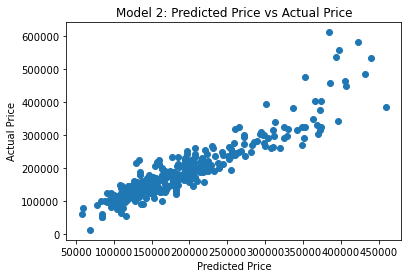

In [32]:
plt.scatter(lr_poly.predict(Z_test_poly), y_test_poly)
plt.title('Model 2: Predicted Price vs Actual Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price');

#### Performing Lasso regularization on model 2

In [33]:
# Instantiating Lasso regularization
lasso_poly = LassoCV(n_alphas=200, max_iter=2000, tol=0.001)

In [34]:
# Fitting the lasso model
lasso_poly.fit(Z_train_poly, y_train_poly)

# Calculating best alpha for the model
lasso_poly.alpha_

68.07213656178153

In [35]:
# Reinstantiate Lasso with the best alpha.
lasso_best_poly = Lasso(alpha=lasso_poly.alpha_)

In [36]:
# Evaluating with 10 folds cross validation scoring with mean squared error
- cross_val_score(
    lasso_best_poly,
    Z_train_poly,
    y_train_poly,
    cv=10,
    scoring='neg_mean_squared_error'
).mean()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21598393004.085938, tolerance: 911813240.1188781
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26349329887.602905, tolerance: 895785388.4625093
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9510684482.565552, tolerance: 902758369.697743
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarni

857898463.886656

In [37]:
# Refitting the lasso model
lasso_best_poly.fit(Z_train_poly, y_train_poly)

# Calculating the mean squared error on the test data
mean_squared_error(
    y_test_poly,
    lasso_best_poly.predict(Z_test_poly)
)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16915794641.687744, tolerance: 998824333.5884902
  model = cd_fast.enet_coordinate_descent(


1044445788.017494

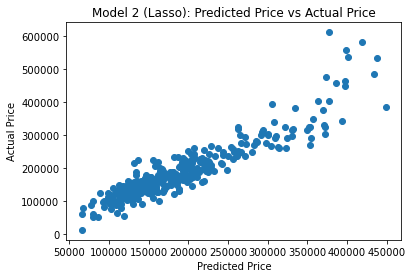

In [38]:
plt.scatter(lasso_best_poly.predict(Z_test_poly), y_test_poly)
plt.title('Model 2 (Lasso): Predicted Price vs Actual Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price');

#### Performing Ridge regularization on model 2

In [39]:
# Instantiating Ridge regularization#### Performing Ridge regularization on model 1
ridge_poly = RidgeCV(alphas=np.logspace(0, 10, 200))

In [40]:
# Fitting the Ridge model
ridge_poly.fit(Z_train_poly, y_train_poly)

# Calculating best alpha for the model
ridge_poly.alpha_

10.116379797662075

In [41]:
# Reinstantiate Lasso with the best alpha.

ridge_best_poly = Ridge(alpha=ridge_poly.alpha_)

In [42]:
# Evaluating with 10 folds cross validation scoring with mean squared error
- cross_val_score(
    ridge_best_poly,
    Z_train_poly,
    y_train_poly,
    cv=10,
    scoring='neg_mean_squared_error'
).mean()

848784766.8898928

In [43]:
# Refitting the Ridge model
ridge_best_poly.fit(Z_train_poly, y_train_poly)

# Calculating the mean squared error on the test data
mean_squared_error(
    y_test_poly,
    ridge_best_poly.predict(Z_test_poly)
)

1065349080.0216826

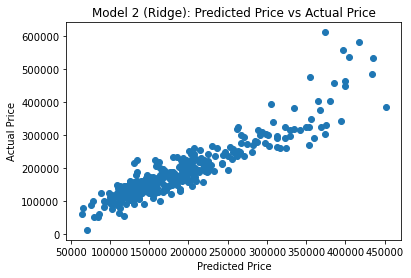

In [44]:
plt.scatter(ridge_best_poly.predict(Z_test_poly), y_test_poly)
plt.title('Model 2 (Ridge): Predicted Price vs Actual Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price');

While the MSE and cross val score of model 2 seems to have improved, I believe that I should explore other variables and add them into my model before creating the polynomial features. 

### Model 3

I will continue to add more variables to my model to see if some of the other features which I have previously identified in the EDA will be able to improve the model.

In [45]:
# Reference to model 1 features
features_1

['overall_qual',
 'gr_liv_area',
 'garage_area',
 'age',
 'neighborhood_value',
 'totrms_abvgrd',
 'full_bath']

Previously, there were not categorical features in my model. However, to valuate property, we also have to look at the location and other factors of the property. Hence, there is a need to add in cat3gorical features.

I will be dummifying the variables to add into the model

In [46]:
# Dummify the variables of interest
ames_dummies3 = pd.get_dummies(
    data=ames,
    drop_first=True,
    columns=[
        'ms_subclass', 'ms_zoning', 'functional', 'foundation',
        'condition_1', 'central_air'
])

In [47]:
# Creating the model by all unwanted columns
x_var_model_3 = ames_dummies3.drop(columns= [
    # features to keep
    #'overall_qual', 'gr_liv_area','garage_area',
    #'age', 'neighborhood_value', 'totrms_abvgrd',
    #'full_bath', 'exter_qual', 'total_bsmt_sf',
    #'bsmt_qual', 'mas_vnr_area'
    
    # unwanted features
    'id', 'pid', 'lot_frontage', 'lot_area', 'street', 'lot_shape',
    'land_contour', 'utilities', 'lot_config','land_slope',
    'neighborhood', 'condition_2', 'bldg_type','house_style',
    'overall_cond', 'year_built','year_remod/add','roof_style',
    'roof_matl', 'exterior_1st','exterior_2nd','mas_vnr_type',
    'exter_cond', 'bsmt_cond', 'bsmt_exposure','bsmtfin_type_1',
    'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2','bsmt_unf_sf',
    'heating', 'heating_qc','electrical', '1st_flr_sf','2nd_flr_sf',
    'low_qual_fin_sf','bsmt_full_bath', 'bsmt_half_bath','half_bath',
    'bedroom_abvgr', 'kitchen_abvgr', 'fireplaces','garage_type',
    'garage_yr_blt', 'garage_finish', 'garage_cars','garage_qual',
    'garage_cond', 'paved_drive', 'wood_deck_sf','open_porch_sf',
    'enclosed_porch', '3ssn_porch', 'screen_porch','pool_area',
    'misc_val', 'mo_sold', 'yr_sold', 'sale_type','age_since_remodel',
    
    # y to be kept
    #'saleprice'
])

In [48]:
# Check to ensure that all the features are present
x_var_model_3

,overall_qual,mas_vnr_area,exter_qual,bsmt_qual,total_bsmt_sf,gr_liv_area,full_bath,kitchen_qual,totrms_abvgrd,garage_area,...,foundation_Wood,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,central_air_Y
0,6,289.0,4,3,725.0,1479,2,4,6,475.0,...,0,0,0,0,0,1,0,0,0,1
1,7,132.0,4,4,913.0,2122,2,4,8,559.0,...,0,0,1,0,0,0,0,0,0,1
2,5,0.0,3,3,1057.0,1057,1,4,5,246.0,...,0,0,1,0,0,0,0,0,0,1
3,5,0.0,3,4,384.0,1444,2,3,7,400.0,...,0,0,1,0,0,0,0,0,0,1
4,6,0.0,3,2,676.0,1445,2,3,6,484.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,8,0.0,4,4,1884.0,1728,2,4,7,520.0,...,0,0,1,0,0,0,0,0,0,1
2042,4,0.0,3,3,861.0,861,1,3,4,539.0,...,0,0,1,0,0,0,0,0,0,1
2043,6,0.0,3,3,896.0,1913,1,3,9,342.0,...,0,0,1,0,0,0,0,0,0,1
2044,4,0.0,3,3,1200.0,1200,1,3,6,294.0,...,0,0,1,0,0,0,0,0,0,1


In [49]:
# Creating a list of the columns excluding saleprice
features_3 = [col for col in x_var_model_3._get_numeric_data().columns if col != 'saleprice']

# Assembling X and y variables.
X3 = x_var_model_3[features_3]
y3 = x_var_model_3['saleprice']

# Creating a train/test split
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X3,
    y3,
    test_size=0.2,
)

In [50]:
# Scale the the variables as the features are all on different scales.
ss = StandardScaler()
ss.fit(X_train3)

Z_train3 = ss.transform(X_train3)
Z_test3 = ss.transform(X_test3)


In [51]:
# Instantiating the model
lr3 = LinearRegression()

In [52]:
# Fitting it to the scaled variables
lr3.fit(Z_train3, y_train3)

LinearRegression()

In [53]:
# Evaluating with 10 folds cross validation scoring with mean squared error
- cross_val_score(
    lr3,
    Z_train3,
    y_train3,
    cv=10,
    scoring='neg_mean_squared_error'
).mean()

5.942677531478621e+31

In [54]:
# Calculating the mean squared error on the test data
mean_squared_error(
    y_test3,
    lr3.predict(Z_test3)
)

1.6578277182950332e+30

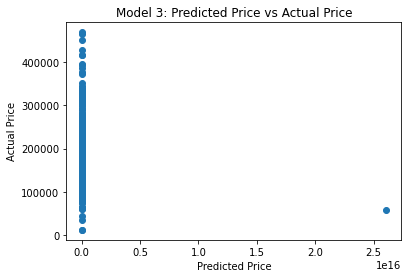

In [55]:
plt.scatter(lr3.predict(Z_test3), y_test3)
plt.title('Model 3: Predicted Price vs Actual Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price');

#### Performing Lasso regularization on model 3

In [56]:
# Instantiating Lasso regularization
lasso3 = LassoCV(n_alphas=200)

In [57]:
# Fitting the lasso model
lasso3.fit(Z_train3, y_train3)

# Calculating best alpha for the model
lasso3.alpha_

287.2694876302212

In [58]:
# Reinstantiate Lasso with the best alpha.
lasso_best3 = Lasso(alpha=lasso3.alpha_)

In [59]:
# Evaluating with 10 folds cross validation scoring with mean squared error
- cross_val_score(
    lasso_best3,
    Z_train3,
    y_train3,
    cv=10,
    scoring='neg_mean_squared_error'
).mean()

835573053.6019256

In [60]:
# Refitting the lasso model
lasso_best3.fit(Z_train3, y_train3)

# Calculating the mean squared error on the test data
mean_squared_error(
    y_test3,
    lasso_best3.predict(Z_test3)
)

785314915.7812783

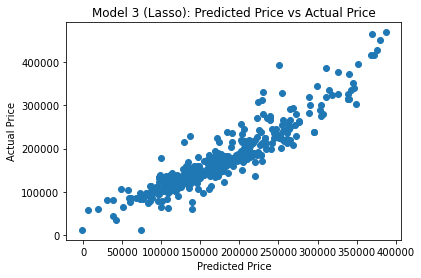

In [61]:
plt.scatter(lasso_best3.predict(Z_test3), y_test3)
plt.title('Model 3 (Lasso): Predicted Price vs Actual Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price');

#### Performing Ridge regularization on model 3

In [62]:
# Instantiating Ridge regularization
ridge3 = RidgeCV(alphas=np.logspace(0, 10, 200))

In [63]:
# Fitting the Ridge model
ridge3.fit(Z_train3, y_train3)

# Calculating best alpha for the model
ridge3.alpha_

22.739657523579286

In [64]:
# Reinstantiate Lasso with the best alpha.
ridge_best3 = Ridge(alpha=ridge3.alpha_)

In [65]:
# Evaluating with 10 folds cross validation scoring with mean squared error
- cross_val_score(
    ridge_best3,
    Z_train3,
    y_train3,
    cv=10,
    scoring='neg_mean_squared_error'
).mean()

839903317.8375324

In [66]:
# Refitting the Ridge model
ridge_best3.fit(Z_train3, y_train3)

# Calculating the mean squared error on the test data
mean_squared_error(
    y_test3,
    ridge_best3.predict(Z_test3)
)

786912052.2533009

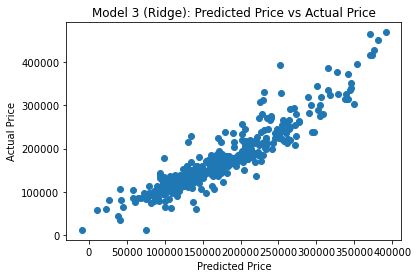

In [67]:
plt.scatter(ridge_best3.predict(Z_test3), y_test3)
plt.title('Model 3 (Ridge): Predicted Price vs Actual Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price');

This model seems to have improved significantly over model 1 and the MSE and cross val score are still relatively close to each other after perform ridge and lasso regularization on the model. This seems to performing better than model 1. However, there is still room for improvement.

### Model 4

Now I want to try adding all the variables which was previously identified during the EDA. I would also futher engineer some of the existing variables.

In [68]:
# Reference to what was used in model 3
features_3

['overall_qual',
 'mas_vnr_area',
 'exter_qual',
 'bsmt_qual',
 'total_bsmt_sf',
 'gr_liv_area',
 'full_bath',
 'kitchen_qual',
 'totrms_abvgrd',
 'garage_area',
 'age',
 'neighborhood_value',
 'ms_subclass_30',
 'ms_subclass_40',
 'ms_subclass_45',
 'ms_subclass_50',
 'ms_subclass_60',
 'ms_subclass_70',
 'ms_subclass_75',
 'ms_subclass_80',
 'ms_subclass_85',
 'ms_subclass_90',
 'ms_subclass_120',
 'ms_subclass_150',
 'ms_subclass_160',
 'ms_subclass_180',
 'ms_subclass_190',
 'ms_zoning_C (all)',
 'ms_zoning_FV',
 'ms_zoning_I (all)',
 'ms_zoning_RH',
 'ms_zoning_RL',
 'ms_zoning_RM',
 'functional_Maj2',
 'functional_Min1',
 'functional_Min2',
 'functional_Mod',
 'functional_Sal',
 'functional_Sev',
 'functional_Typ',
 'foundation_CBlock',
 'foundation_PConc',
 'foundation_Slab',
 'foundation_Stone',
 'foundation_Wood',
 'condition_1_Feedr',
 'condition_1_Norm',
 'condition_1_PosA',
 'condition_1_PosN',
 'condition_1_RRAe',
 'condition_1_RRAn',
 'condition_1_RRNe',
 'condition_1_RRN

In [69]:
ames

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_since_remodel,age,neighborhood_value
0,109,533352170,60,RL,0.0,13517,Pave,IR1,Lvl,AllPub,...,0,0,0,3,2010,WD,130500,5,34,1.37
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,0,0,0,4,2009,WD,220000,12,13,1.88
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,0,0,0,1,2010,WD,109000,3,57,1.46
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,...,0,0,0,4,2010,WD,174000,3,4,2.40
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,...,0,0,0,3,2010,WD,138500,17,110,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,1587,921126030,20,RL,79.0,11449,Pave,IR1,HLS,AllPub,...,0,0,0,1,2008,WD,298751,1,1,2.40
2042,785,905377130,30,RL,0.0,12342,Pave,IR1,Lvl,AllPub,...,0,0,0,3,2009,WD,82500,59,69,1.30
2043,916,909253010,50,RL,57.0,7558,Pave,Reg,Bnk,AllPub,...,0,0,0,3,2009,WD,177000,59,81,2.06
2044,639,535179160,20,RL,80.0,10400,Pave,Reg,Lvl,AllPub,...,0,0,0,11,2009,WD,144000,53,53,1.46


Model 3 included only full baths as a feature. However, as Ames is a collegetown, many of the occupants are actually students. Many of those students may also be sharing a property which makes half baths appealing as well. Hence, I will create a new column which adds all the full baths and half baths together.

In [70]:
# Creating a new feature
ames['all_baths'] = ames['full_bath'] + ames['half_bath'] + ames['bsmt_full_bath'] + ames['bsmt_half_bath']

In [71]:
# Dummify the variables of interest
ames_dummies4 = pd.get_dummies(
    data=ames,
    drop_first=True,
    columns=[
        'ms_subclass','ms_zoning',
        'lot_config', 'land_contour', 'lot_shape',
        'heating', 'central_air', 'sale_type',
        'exterior_1st', 'exterior_2nd', 'functional', 'foundation',
        'condition_1', 'bldg_type', 'house_style'
])

In [72]:
# Creating the model by all unwanted columns
x_var_model_4 = ames_dummies4.drop(columns= [
    # features to keep
    #'overall_qual', 'gr_liv_area','garage_area',
    #'age','totrms_abvgrd',
    #'all_baths', 'exter_qual', 'total_bsmt_sf',
    #'bsmt_qual', 'mas_vnr_area', 'heating_qc'
    #'fireplaces', 'exter_cond'
    #'wood_deck_sf', 'open_porch_sf',
    
    # unwanted features
    'id', 'pid', 'lot_frontage', 'lot_area', 'street',
    'utilities','land_slope','neighborhood', 'condition_2',
    'overall_cond', 'year_built','year_remod/add','roof_style',
    'roof_matl', 'mas_vnr_type', 'bsmt_cond',
    'bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1', 'bsmtfin_type_2',
    'bsmtfin_sf_2','bsmt_unf_sf', 'electrical', '1st_flr_sf',
    '2nd_flr_sf', 'low_qual_fin_sf', 'bsmt_full_bath', 'bsmt_half_bath',
    'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr',
    'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars',
    'garage_qual', 'garage_cond', 'paved_drive', 'enclosed_porch',
    '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'mo_sold',
    'yr_sold', 'age_since_remodel',
    
    # y to be kept
    #'saleprice'
])

In [73]:
# Check to ensure that all the features are present
x_var_model_4

,overall_qual,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,total_bsmt_sf,heating_qc,gr_liv_area,kitchen_qual,totrms_abvgrd,...,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl
0,6,289.0,4,3,3,725.0,5,1479,4,6,...,0,0,0,0,0,0,0,1,0,0
1,7,132.0,4,3,4,913.0,5,2122,4,8,...,0,0,0,0,0,0,0,1,0,0
2,5,0.0,3,4,3,1057.0,3,1057,4,5,...,0,0,0,0,1,0,0,0,0,0
3,5,0.0,3,3,4,384.0,4,1444,3,7,...,0,0,0,0,0,0,0,1,0,0
4,6,0.0,3,3,2,676.0,3,1445,3,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,8,0.0,4,3,4,1884.0,5,1728,4,7,...,0,0,0,0,1,0,0,0,0,0
2042,4,0.0,3,3,3,861.0,5,861,3,4,...,0,0,0,0,1,0,0,0,0,0
2043,6,0.0,3,3,3,896.0,4,1913,3,9,...,0,0,0,0,0,0,0,0,0,0
2044,4,0.0,3,3,3,1200.0,3,1200,3,6,...,0,0,0,0,1,0,0,0,0,0


In [74]:
# Creating a list of the columns excluding saleprice
features_4 = [col for col in x_var_model_4._get_numeric_data().columns if col != 'saleprice']

# Assembling X and y variables.
X4 = x_var_model_4[features_4]
y4 = x_var_model_4['saleprice']

# Creating a train/test split
X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X4,
    y4,
    test_size=0.2,
)

In [75]:
# Scale the the variables as the features are all on different scales.
ss = StandardScaler()
ss.fit(X_train4)

Z_train4 = ss.transform(X_train4)
Z_test4 = ss.transform(X_test4)


In [76]:
# Instantiating the model
lr4 = LinearRegression()

In [77]:
# Fitting it to the scaled variables
lr4.fit(Z_train4, y_train4)

LinearRegression()

In [78]:
# Evaluating with 10 folds cross validation scoring with mean squared error
- cross_val_score(
    lr4,
    Z_train4,
    y_train4,
    cv=10,
    scoring='neg_mean_squared_error'
).mean()

1.3993146356154248e+33

In [79]:
# Calculating the mean squared error on the test data
mean_squared_error(
    y_test4,
    lr4.predict(Z_test4)
)

7.527697209505652e+28

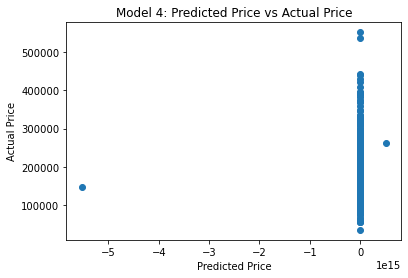

In [80]:
plt.scatter(lr4.predict(Z_test4), y_test4)
plt.title('Model 4: Predicted Price vs Actual Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price');

#### Performing Lasso regularization on model 4

In [81]:
# Instantiating Lasso regularization
lasso4 = LassoCV(n_alphas=200)

In [82]:
# Fitting the lasso model
lasso4.fit(Z_train4, y_train4)

# Calculating best alpha for the model
lasso4.alpha_

904.1242248762178

In [83]:
# Reinstantiate Lasso with the best alpha.
lasso_best4 = Lasso(alpha=lasso4.alpha_)

In [84]:
# Evaluating with 10 folds cross validation scoring with mean squared error
- cross_val_score(
    lasso_best4,
    Z_train4,
    y_train4,
    cv=10,
    scoring='neg_mean_squared_error'
).mean()

766818966.1981301

In [85]:
# Refitting the lasso model
lasso_best4.fit(Z_train4, y_train4)

# Calculating the mean squared error on the test data
mean_squared_error(
    y_test4,
    lasso_best4.predict(Z_test4)
)

700309414.7770089

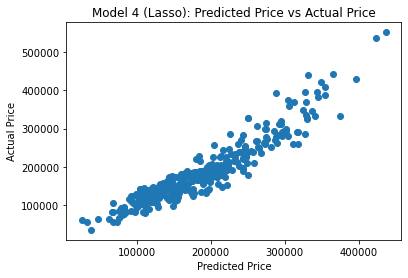

In [86]:
plt.scatter(lasso_best4.predict(Z_test4), y_test4)
plt.title('Model 4 (Lasso): Predicted Price vs Actual Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price');

#### Performing Ridge regularization on model 4

In [87]:
# Instantiating Ridge regularization
ridge4 = RidgeCV(alphas=np.logspace(0, 10, 200))

In [88]:
# Fitting the Ridge model
ridge4.fit(Z_train4, y_train4)

# Calculating best alpha for the model
ridge4.alpha_

64.42363508721374

In [89]:
# Reinstantiate Lasso with the best alpha.
ridge_best4 = Ridge(alpha=ridge4.alpha_)

In [90]:
# Evaluating with 10 folds cross validation scoring with mean squared error
- cross_val_score(
    ridge_best4,
    Z_train4,
    y_train4,
    cv=10,
    scoring='neg_mean_squared_error'
).mean()

786327935.2363237

In [91]:
# Refitting the Ridge model
ridge_best4.fit(Z_train4, y_train4)

# Calculating the mean squared error on the test data
mean_squared_error(
    y_test4,
    ridge_best4.predict(Z_test4)
)

658461973.6359664

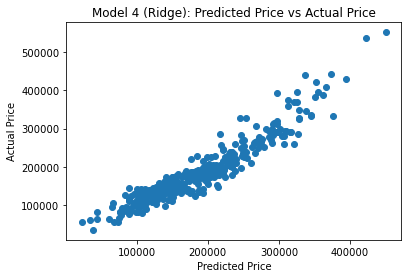

In [92]:
plt.scatter(ridge_best4.predict(Z_test4), y_test4)
plt.title('Model 4 (Ridge): Predicted Price vs Actual Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price');

In this model, there are 121 columns which seems to create some overfitting with the model. I would then like to try and reduce the number of dummies by grouping some of the categorical variables similiar to how I grouped the neighborhoods.

### Model 5

Changing the categorical variables to a numerical value and grouping the categories together may give a better result.

Similar to the neighborhood column, I will be grouping the categories by their average sale price and giving them a value based on the average category sale price divided by 100,000.

In [93]:
# Creating a function to change 
def group_by_price(col_name):
    col_name = ames.groupby(col_name)['saleprice'].mean()
    col_name = col_name.to_dict()
    
    for key, value in col_name.items():
        col_name[key] = round((value/100000), 2)
        
    return col_name

#### Creating new columns for all categorical variables of interest.

For the categorical variables below, they will all follow a 2 step process:
1) Create a dictionary <br/>
2) Apply the the new values into the new columns

In [94]:
subclass_dict = group_by_price('ms_subclass')
subclass_dict

{20: 1.89,
 30: 0.95,
 40: 1.19,
 45: 1.16,
 50: 1.37,
 60: 2.39,
 70: 1.53,
 75: 2.05,
 80: 1.7,
 85: 1.54,
 90: 1.39,
 120: 2.12,
 150: 1.48,
 160: 1.38,
 180: 1.1,
 190: 1.24}

In [95]:
ames['ms_subclass_value'] = ames['ms_subclass'].apply(
    lambda x: subclass_dict[x]
)

In [96]:
zone_dict = group_by_price('ms_zoning')
zone_dict

{'A (agr)': 0.47,
 'C (all)': 0.78,
 'FV': 2.19,
 'I (all)': 0.58,
 'RH': 1.49,
 'RL': 1.91,
 'RM': 1.29}

In [97]:
ames['ms_zoning_value'] = ames['ms_zoning'].apply(
    lambda x: zone_dict[x]
)

In [98]:
config_dict = group_by_price('lot_config')
config_dict 

{'Corner': 1.81, 'CulDSac': 2.3, 'FR2': 1.75, 'FR3': 1.99, 'Inside': 1.77}

In [99]:
ames['lot_config_value'] = ames['lot_config'].apply(
    lambda x: config_dict[x]
)

In [100]:
contour_dict = group_by_price('land_contour') 
contour_dict 

{'Bnk': 1.42, 'HLS': 2.62, 'Low': 1.95, 'Lvl': 1.79}

In [101]:
ames['land_contour_value'] = ames['land_contour'].apply(
    lambda x: contour_dict[x]
)

In [102]:
lot_shape_dict = group_by_price('lot_shape') 
lot_shape_dict 

{'IR1': 2.12, 'IR2': 2.32, 'IR3': 1.97, 'Reg': 1.63}

In [103]:
ames['lot_shape_value'] = ames['lot_shape'].apply(
    lambda x: lot_shape_dict[x]
)

In [104]:
heating_dict = group_by_price('heating') 
heating_dict 

{'GasA': 1.82, 'GasW': 1.51, 'Grav': 0.65, 'OthW': 1.26, 'Wall': 0.77}

In [105]:
ames['heating_value'] = ames['heating'].apply(
    lambda x: heating_dict[x]
)

In [106]:
sale_type_dict = group_by_price('sale_type') 
sale_type_dict 

{'COD': 1.34,
 'CWD': 1.87,
 'Con': 2.42,
 'ConLD': 1.29,
 'ConLI': 2.08,
 'ConLw': 1.25,
 'New': 2.8,
 'Oth': 1.27,
 'WD ': 1.75}

In [107]:
ames['sale_type_value'] = ames['sale_type'].apply(
    lambda x: sale_type_dict[x]
)

In [108]:
exterior_1st_dict = group_by_price('exterior_1st') 
exterior_1st_dict 

{'AsbShng': 1.03,
 'AsphShn': 0.82,
 'BrkComm': 1.31,
 'BrkFace': 1.93,
 'CBlock': 0.93,
 'CemntBd': 2.44,
 'HdBoard': 1.6,
 'ImStucc': 2.62,
 'MetalSd': 1.54,
 'Plywood': 1.7,
 'Stone': 2.58,
 'Stucco': 1.39,
 'VinylSd': 2.18,
 'Wd Sdng': 1.42,
 'WdShing': 1.56}

In [109]:
ames['exterior_1st_value'] = ames['exterior_1st'].apply(
    lambda x: exterior_1st_dict[x]
)

In [110]:
exterior_2nd_dict = group_by_price('exterior_2nd') 
exterior_2nd_dict 

{'AsbShng': 1.07,
 'AsphShn': 1.32,
 'Brk Cmn': 1.4,
 'BrkFace': 1.88,
 'CBlock': 0.92,
 'CmentBd': 2.4,
 'HdBoard': 1.6,
 'ImStucc': 2.27,
 'MetalSd': 1.56,
 'Plywood': 1.66,
 'Stone': 1.45,
 'Stucco': 1.47,
 'VinylSd': 2.18,
 'Wd Sdng': 1.46,
 'Wd Shng': 1.54}

In [111]:
ames['exterior_2nd'] = ames['exterior_2nd'].apply(
    lambda x: exterior_2nd_dict[x]
)

In [112]:
functional_dict = group_by_price('functional') 
functional_dict 

{'Maj1': 1.63,
 'Maj2': 0.87,
 'Min1': 1.54,
 'Min2': 1.5,
 'Mod': 1.48,
 'Sal': 0.32,
 'Sev': 0.96,
 'Typ': 1.84}

In [113]:
ames['functional_value'] = ames['functional'].apply(
    lambda x: functional_dict[x]
)

In [114]:
foundation_dict = group_by_price('foundation') 
foundation_dict 

{'BrkTil': 1.29,
 'CBlock': 1.48,
 'PConc': 2.28,
 'Slab': 1.09,
 'Stone': 1.43,
 'Wood': 1.74}

In [115]:
ames['foundation_value'] = ames['foundation'].apply(
    lambda x: foundation_dict[x]
)

In [116]:
condition_1_dict = group_by_price('condition_1') 
condition_1_dict 

{'Artery': 1.29,
 'Feedr': 1.43,
 'Norm': 1.85,
 'PosA': 2.55,
 'PosN': 2.55,
 'RRAe': 1.4,
 'RRAn': 1.73,
 'RRNe': 1.3,
 'RRNn': 1.98}

In [117]:
ames['condition_1_value'] = ames['condition_1'].apply(
    lambda x: condition_1_dict[x]
)

In [118]:
bldg_type_dict = group_by_price('bldg_type') 
bldg_type_dict 

{'1Fam': 1.85, '2fmCon': 1.23, 'Duplex': 1.39, 'Twnhs': 1.33, 'TwnhsE': 1.98}

In [119]:
ames['bldg_type_value'] = ames['bldg_type'].apply(
    lambda x: bldg_type_dict[x]
)

In [120]:
house_style_dict = group_by_price('house_style') 
house_style_dict 

{'1.5Fin': 1.36,
 '1.5Unf': 1.12,
 '1Story': 1.8,
 '2.5Fin': 2.44,
 '2.5Unf': 1.92,
 '2Story': 2.06,
 'SFoyer': 1.49,
 'SLvl': 1.66}

In [121]:
ames['house_style_value'] = ames['house_style'].apply(
    lambda x: house_style_dict[x]
)

After assigning values to the various categorical variables. We can now start on model 5.

In [122]:
ames

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,land_contour_value,lot_shape_value,heating_value,sale_type_value,exterior_1st_value,functional_value,foundation_value,condition_1_value,bldg_type_value,house_style_value
0,109,533352170,60,RL,0.0,13517,Pave,IR1,Lvl,AllPub,...,1.79,2.12,1.82,1.75,1.60,1.84,1.48,1.40,1.85,2.06
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,1.79,2.12,1.82,1.75,2.18,1.84,2.28,1.85,1.85,2.06
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,1.79,1.63,1.82,1.75,2.18,1.84,1.48,1.85,1.85,1.80
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,...,1.79,1.63,1.82,1.75,2.18,1.84,2.28,1.85,1.85,2.06
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,...,1.79,2.12,1.82,1.75,1.42,1.84,2.28,1.85,1.85,1.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,1587,921126030,20,RL,79.0,11449,Pave,IR1,HLS,AllPub,...,2.62,2.12,1.82,1.75,2.18,1.84,2.28,1.85,1.85,1.80
2042,785,905377130,30,RL,0.0,12342,Pave,IR1,Lvl,AllPub,...,1.79,2.12,1.82,1.75,2.18,1.84,1.48,1.85,1.85,1.80
2043,916,909253010,50,RL,57.0,7558,Pave,Reg,Bnk,AllPub,...,1.42,1.63,1.82,1.75,1.93,1.84,1.29,1.85,1.85,1.36
2044,639,535179160,20,RL,80.0,10400,Pave,Reg,Lvl,AllPub,...,1.79,1.63,1.82,1.75,1.70,1.84,1.48,1.85,1.85,1.80


In [123]:
# Dummify the variables of interest
# 'Central_air' is left as it is a binary variable

ames_dummies5 = pd.get_dummies(
    data=ames,
    drop_first=True,
    columns=[
         'central_air',
])

In [124]:
# Creating the model by all unwanted columns
x_var_model_5 = ames_dummies5.drop(columns= [
    # features to keep
    #'overall_qual', 'gr_liv_area','garage_area',
    #'age','totrms_abvgrd',
    #'all_baths', 'exter_qual', 'total_bsmt_sf',
    #'bsmt_qual', 'mas_vnr_area', 'heating_qc'
    #'fireplaces', 'exter_cond'
    #'wood_deck_sf', 'open_porch_sf'
    
    
    # unwanted features
    'id', 'pid', 'lot_frontage', 'lot_area', 'street',
    'utilities','land_slope','neighborhood', 'condition_2',
    'overall_cond', 'year_built','year_remod/add','roof_style',
    'roof_matl', 'mas_vnr_type', 'bsmt_cond',
    'bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1', 'bsmtfin_type_2',
    'bsmtfin_sf_2','bsmt_unf_sf', 'electrical', '1st_flr_sf',
    '2nd_flr_sf', 'low_qual_fin_sf', 'bsmt_full_bath', 'bsmt_half_bath',
    'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr',
    'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars',
    'garage_qual', 'garage_cond', 'paved_drive', 
    'enclosed_porch', '3ssn_porch', 'screen_porch',
    'pool_area', 'misc_val', 'mo_sold', 'yr_sold',
    'age_since_remodel', 'sale_type', 'exterior_1st', 'exterior_2nd',
    'functional', 'foundation', 'condition_1', 'bldg_type',
    'house_style', 'ms_subclass','ms_zoning', 'lot_config', 
    'land_contour', 'lot_shape','heating', 
    
    # y to be kept
    #'saleprice'
])

In [125]:
# Creating a list of the columns excluding saleprice
features_5 = [col for col in x_var_model_5._get_numeric_data().columns if col != 'saleprice']

# Assembling X and y variables.
X5 = x_var_model_5[features_5]
y5 = x_var_model_5['saleprice']

# Creating a train/test split
X_train5, X_test5, y_train5, y_test5 = train_test_split(
    X5,
    y5,
    test_size=0.2,
)

In [126]:
# Scale the the variables as the features are all on different scales.
ss = StandardScaler()
ss.fit(X_train5)

Z_train5 = ss.transform(X_train5)
Z_test5 = ss.transform(X_test5)


In [127]:
# Instantiating the model
lr5 = LinearRegression()

In [128]:
# Fitting it to the scaled variables
lr5.fit(Z_train5, y_train5)

LinearRegression()

In [129]:
# Evaluating with 10 folds cross validation scoring with mean squared error
- cross_val_score(
    lr5,
    Z_train5,
    y_train5,
    cv=10,
    scoring='neg_mean_squared_error'
).mean()

807777111.5128

In [130]:
# Calculating the mean squared error on the test data
mean_squared_error(
    y_test5,
    lr5.predict(Z_test5)
)

763876341.7574149

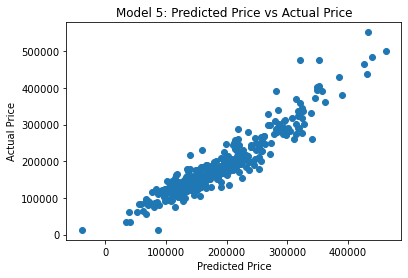

In [131]:
plt.scatter(lr5.predict(Z_test5), y_test5)
plt.title('Model 5: Predicted Price vs Actual Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price');

#### Performing Lasso regularization on model 5

In [132]:
# Instantiating Lasso regularization
lasso5 = LassoCV(n_alphas=200)

In [133]:
# Fitting the lasso model
lasso5.fit(Z_train5, y_train5)

# Calculating best alpha for the model
lasso5.alpha_

561.8434710637039

In [134]:
# Reinstantiate Lasso with the best alpha.
lasso_best5 = Lasso(alpha=lasso5.alpha_)

In [135]:
# Evaluating with 10 folds cross validation scoring with mean squared error
- cross_val_score(
    lasso_best5,
    Z_train5,
    y_train5,
    cv=10,
    scoring='neg_mean_squared_error'
).mean()

804679224.7776095

In [136]:
# Refitting the lasso model
lasso_best5.fit(Z_train5, y_train5)

# Calculating the mean squared error on the test data
mean_squared_error(
    y_test5,
    lasso_best5.predict(Z_test5)
)

768208430.0610346

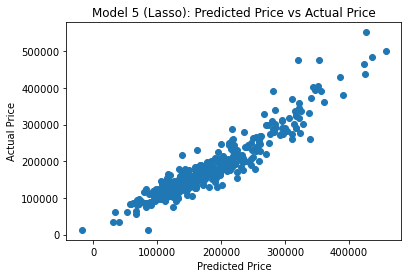

In [137]:
plt.scatter(lasso_best5.predict(Z_test5), y_test5)
plt.title('Model 5 (Lasso): Predicted Price vs Actual Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price');

#### Performing Ridge regularization on model 5

In [138]:
# Instantiating Ridge regularization
ridge5 = RidgeCV(alphas=np.logspace(0, 10, 200))

In [139]:
# Fitting the Ridge model
ridge5.fit(Z_train5, y_train5)

# Calculating best alpha for the model
ridge5.alpha_

36.12342699709432

In [140]:
# Reinstantiate Lasso with the best alpha.
ridge_best5 = Ridge(alpha=ridge5.alpha_)

In [141]:
# Evaluating with 10 folds cross validation scoring with mean squared error
- cross_val_score(
    ridge_best5,
    Z_train5,
    y_train5,
    cv=10,
    scoring='neg_mean_squared_error'
).mean()

806509214.4632354

In [142]:
# Refitting the Ridge model
ridge_best5.fit(Z_train5, y_train5)

# Calculating the mean squared error on the test data
mean_squared_error(
    y_test5,
    ridge_best5.predict(Z_test5)
)

766458509.7371125

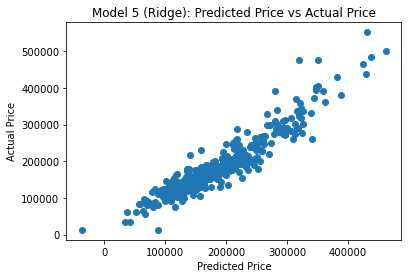

In [143]:
plt.scatter(ridge_best5.predict(Z_test5), y_test5)
plt.title('Model 5 (Ridge): Predicted Price vs Actual Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price');

Converting the variables did not seem to have improve the model by much. However, the number of variables had cut down from over 100 to approximately 30. This makes the model less complicated. This is likely the best mix of variables that I should add into the model.

From the scatterplots of the graph, there is still some slight curvature and as the variables are finalized, we can take a look at applying polynomial regression to the model.

### Model 6

Revisiting polynomial features.

As the graph seems to be a quadratic curve, apply a polynomial degree of 2 is sufficient.

In [144]:
# Instantiating the PolynomialFeature function with a degree of 2.
poly2 = PolynomialFeatures(include_bias=False, degree=2)

In [145]:
# Creating the values of PolynomialFeatures
X_poly2 = poly2.fit_transform(X5)

In [146]:
# Recreating the train/test split
X_train_poly2, X_test_poly2, y_train_poly2, y_test_poly2 = train_test_split(
    X_poly2,
    y5,
    test_size=0.2,
)

In [147]:
# Scale the polynomial features
ss = StandardScaler()
ss.fit(X_train_poly2)

Z_train_poly2 = ss.transform(X_train_poly2)
Z_test_poly2 = ss.transform(X_test_poly2)

In [148]:
# Instantiating the linear regression for this model
lr_poly2 = LinearRegression()

In [149]:
# Fitting the linear regression with the new features
lr_poly2.fit(Z_train_poly2, y_train_poly2)

LinearRegression()

In [150]:
# Evaluating with 10 folds cross validation scoring with mean squared error
- cross_val_score(
    lr_poly2,
    Z_train_poly2,
    y_train_poly2,
    cv=10,
    scoring='neg_mean_squared_error'
).mean()

7.268276939324665e+28

In [151]:
# Calculating the mean squared error on the test data
mean_squared_error(
    y_test_poly2,
    lr_poly2.predict(Z_test_poly2)
)

3.756905415515028e+25

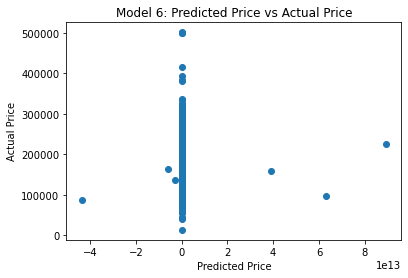

In [152]:
plt.scatter(lr_poly2.predict(Z_test_poly2), y_test_poly2)
plt.title('Model 6: Predicted Price vs Actual Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price');

#### Performing Lasso regularization on model 6

In [153]:
# Instantiating Lasso regularization
lasso_poly2 = LassoCV(n_alphas=200, max_iter=2000, tol=0.001)

In [154]:
# Fitting the lasso model
lasso_poly2.fit(Z_train_poly2, y_train_poly2)

# Calculating best alpha for the model
lasso_poly2.alpha_

146.73577706629163

In [155]:
# Reinstantiate Lasso with the best alpha
lasso_best_poly2 = Lasso(alpha=lasso_poly2.alpha_)

In [156]:
# Evaluating with 10 folds cross validation scoring with mean squared error
- cross_val_score(
    lasso_best_poly2,
    Z_train_poly2,
    y_train_poly2,
    cv=10,
    scoring='neg_mean_squared_error'
).mean()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21248488679.192505, tolerance: 983183097.8084223
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22789123345.16504, tolerance: 978837677.3758599
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17284346879.204224, tolerance: 977227979.7781973
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarn

545787345.8129578

In [157]:
# Refitting the lasso model
lasso_best_poly2.fit(Z_train_poly2, y_train_poly2)

# Calculating the mean squared error on the test data
mean_squared_error(
    y_test_poly2,
    lasso_best_poly2.predict(Z_test_poly2)
)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39925230543.8667, tolerance: 1075990807.1467855
  model = cd_fast.enet_coordinate_descent(


590579474.9470541

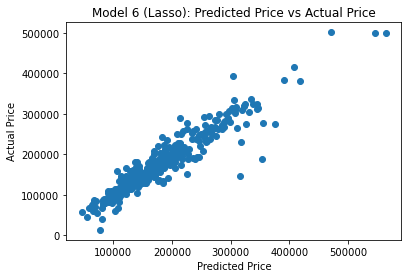

In [158]:
plt.scatter(lasso_best_poly2.predict(Z_test_poly2), y_test_poly2)
plt.title('Model 6 (Lasso): Predicted Price vs Actual Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price');

In [159]:
# Instantiating Ridge regularization#### Performing Ridge regularization on model 1
ridge_poly2 = RidgeCV(alphas=np.logspace(0, 10, 200))

In [160]:
# Fitting the Ridge model
ridge_poly2.fit(Z_train_poly2, y_train_poly2)

# Calculating best alpha for the model
ridge_poly2.alpha_

72.32633896483537

In [161]:
# Reinstantiate Lasso with the best alpha.
ridge_best_poly2 = Ridge(alpha=ridge_poly2.alpha_)

In [162]:
# Evaluating with 10 folds cross validation scoring with mean squared error
- cross_val_score(
    ridge_best_poly2,
    Z_train_poly2,
    y_train_poly2,
    cv=10,
    scoring='neg_mean_squared_error'
).mean()

531311984.6489663

In [163]:
# Refitting the Ridge model
ridge_best_poly2.fit(Z_train_poly2, y_train_poly2)

# Calculating the mean squared error on the test data
mean_squared_error(
    y_test_poly2,
    ridge_best_poly2.predict(Z_test_poly2)
)

564168175.0471417

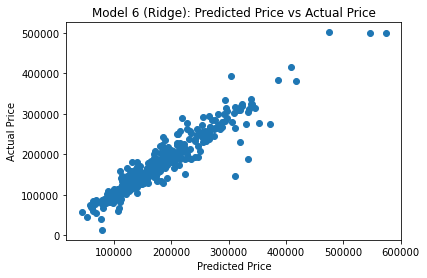

In [164]:
plt.scatter(ridge_best_poly2.predict(Z_test_poly2), y_test_poly2)
plt.title('Model 6 (Ridge): Predicted Price vs Actual Price')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price');

Applying polynomial regression to model 5 reduces the MSE and cross val score quite significantly. The scatter plot also appears to conform to a linear regression.

This model should be the final model to help predict future housing prices.

### Summary Table for model 5

In [165]:
import statsmodels.api as sm

In [166]:
X_ols = x_var_model_5[features_5]
X_ols = sm.add_constant(X_ols)
y_ols = x_var_model_5["saleprice"]
model_5_ols = sm.OLS(y_ols, X_ols).fit()

model_5_ols.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     476.7
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:15:38   Log-Likelihood:                -23813.
No. Observations:                2046   AIC:                         4.769e+04
Df Residuals:                    2014   BIC:                         4.787e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.432e+05   2.34e+04    -14.645      0.000   -3.89e+05   -2.97e+05
overall_qual        7577.8542    836.136      9.063      0.000    5938.072    9217.636
mas_vnr_area          37.4522      4.216      8.883      0.000      29.183      45.721
exter_qual          9931.4997   1915.916      5.184      0.000    6174.116    1.37e+04
exter_cond          4009.2710   1718.038      2.334      0.020     639.953    7378.589
bsmt_qual          -1004.0755   1100.928     -0.912      0.362   -3163.153    1155.002
total_bsmt_sf         31.4592      2.045     15.383      0.000      27.449      35.470
heating_qc          1409.6836    837.413      1.683      0.092    -232.603    3051.971
gr_liv_area           42.5660      2.962     14.369      0.000      36.756      48.376
kitchen_qual        1.162e+04   1476.506      7.868      0.000    8721.869    1.45e+04
totrms_abvgrd       -677.4614    718.400     -0.943      0.346   -2086.347     731.424
fireplaces          7957.8318   1163.159      6.842      0.000    5676.711    1.02e+04
garage_area           32.9275      3.848      8.557      0.000      25.381      40.474
wood_deck_sf          24.3943      5.168      4.720      0.000      14.259      34.530
open_porch_sf         21.4271     10.234      2.094      0.036       1.357      41.497
age                   71.2663     44.561      1.599      0.110     -16.125     158.657
neighborhood_value  2.008e+04   1799.800     11.155      0.000    1.65e+04    2.36e+04
all_baths           5660.0641   1005.505      5.629      0.000    3688.125    7632.003
ms_subclass_value   1188.0619   2618.004      0.454      0.650   -3946.217    6322.340
ms_zoning_value      649.3061   2857.027      0.227      0.820   -4953.732    6252.344
lot_config_value    2.017e+04   5126.027      3.935      0.000    1.01e+04    3.02e+04
land_contour_value  2.174e+04   3487.022      6.234      0.000    1.49e+04    2.86e+04
lot_shape_value     3046.3350   2896.280      1.052      0.293   -2633.684    8726.354
heating_value       6420.0274   7555.696      0.850      0.396   -8397.770    2.12e+04
sale_type_value     2.019e+04   2309.585      8.740      0.000    1.57e+04    2.47e+04
exterior_1st_value  7628.0042   2355.391      3.239      0.001    3008.746    1.22e+04
functional_value    2.472e+04   5971.888      4.140      0.000     1.3e+04    3.64e+04
foundation_value   -3296.5950   2360.645     -1.396      0.163   -7926.156    1332.965
condition_1_value   1.804e+04   3603.850      5.007      0.000     1.1e+04    2.51e+04
bldg_type_value     1.149e+04   4724.154      2.432      0.015    2222.461    2.08e+04
house_style_value  -1.021e+04   3603.551     -2.832      0.005   -1.73e+04   -3139.062
central_air_Y      -4625.9516   2912.296     -1.588      0.112   -1.03e+04    1085.477
======================================

Plotting the features with the highest coef for model 5

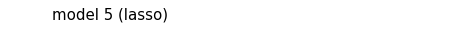

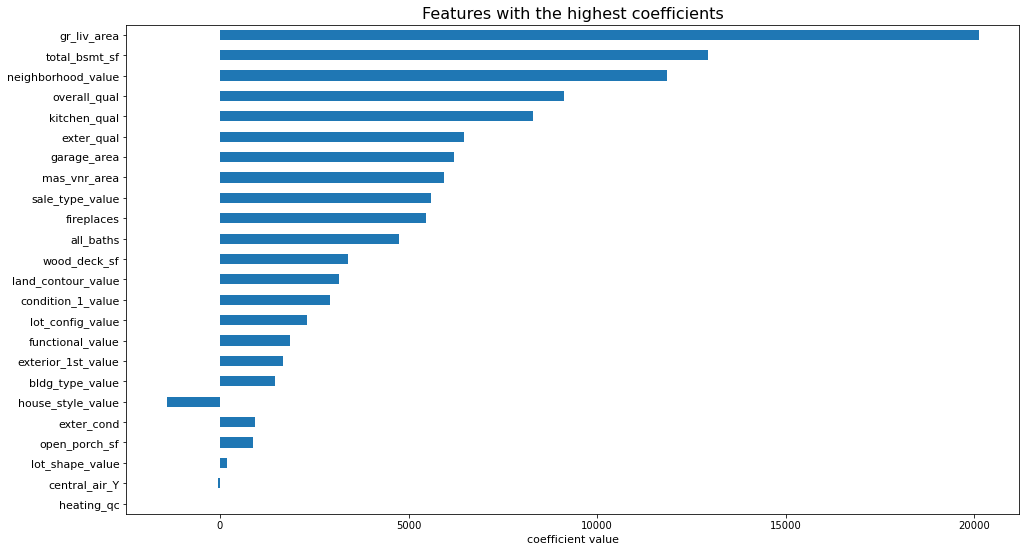

In [167]:
# Create list of coefficients that are not 0
column_name = [col for col in X5.columns if col != 'saleprice']
lasso_coef = pd.DataFrame(lasso_best5.coef_, index = column_name)
lasso_coef = lasso_coef[lasso_coef[0] != 0]                                  

# sort by absolute values
lasso_coef = lasso_coef.reindex(lasso_coef[0].abs().sort_values(ascending=True).index)

plt.figure(figsize=(8, 0.3))
plt.text(
    x = 0.1,                              
    y = 0.9,                             
    s = 'model 5 (lasso)', 
    size = 15,
)                         
plt.axis('off')

lasso_coef.head(100).plot.barh(figsize=(16,9), legend = None)
plt.title('Features with the highest coefficients',fontsize=16)
plt.xlabel('coefficient value', fontsize=11)
plt.yticks(fontsize=11);